(243762, 3)


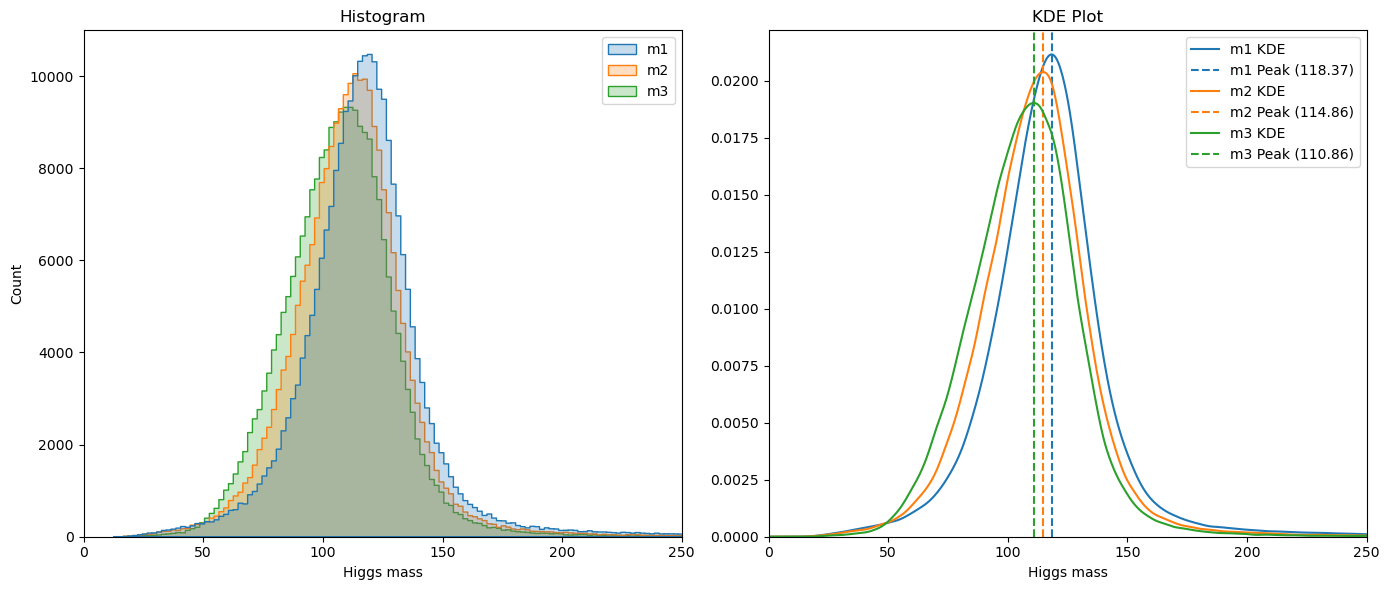

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

def higgs_mass_plot(file, out_prefix):
    # Load the data
    with h5py.File(file, "r") as f:
        m = np.array(f["mass"])
        
    print(m.shape)
    # Prepare the data for KDE plot
    data = {"m1": m[:,0], "m2": m[:,1], "m3": m[:,2]}
    
    # Set up the figure and axis
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot histogram
    sns.histplot(data=data, element="step", ax=axes[0], binwidth=2)
    axes[0].set(xlabel="Higgs mass", xlim=(0, 250))
    axes[0].set_title("Histogram")
    
    # Plot KDEs
    x = np.linspace(0, 250, 1000)
    
    for key, values in data.items():
        kde = gaussian_kde(values)
        kde_values = kde(x)
        line, = axes[1].plot(x, kde_values, label=f'{key} KDE')
        
        # Compute and plot the peak
        peak_x = x[np.argmax(kde_values)]
        axes[1].axvline(peak_x, linestyle='--', color=line.get_color(), label=f'{key} Peak ({peak_x:.2f})')

    # Set y-axis limits starting at 0
    axes[1].set(xlabel="Higgs mass", xlim=(0, 250))
    axes[1].set_ylim(bottom=0)  # Ensure y-axis starts at 0
    axes[1].set_title("KDE Plot")
    axes[1].legend()
    
    # Save figures
    plt.tight_layout()
    plt.savefig(f"{out_prefix}_higgs_mass_plots.png")
    plt.show()

file = "/home/dilatino/root_to_h5/3h_higgs_mass.h5"
higgs_mass_plot(file, "out")